# Dimensionality Reduction

PCA, LDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 

from data_loader import SessionDataLoader
from spikes.filters import gaussian_filter, exp_filter
from spikes.binning import bin_spikes

%load_ext autoreload
%autoreload 2

In [2]:
data_loader = SessionDataLoader("YelBlu6903F", 1)

In [24]:
base_table = data_loader.load_table()

In [27]:
t_arr, spikes = bin_spikes(base_table["spike_times"], min_time=0.0, max_time=0.6)
spikes_filtered = gaussian_filter(spikes, 5.0)

base_table["binned_spikes"] = spikes.tolist()
base_table["psth"] = spikes_filtered.tolist()

In [28]:
table = base_table[base_table["unit"] == (2, 2)]

In [29]:
pca = PCA(n_components=2)

In [30]:
result = pca.fit_transform(table["psth"].tolist())

In [31]:
colors = np.unique(table["call_type"])
colors = [colors.searchsorted(x) for x in table["call_type"]]

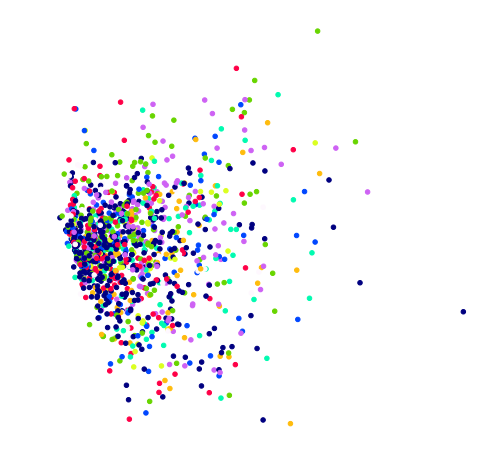

In [54]:
plt.figure(figsize=(8, 8))
plt.scatter(result[:, 0], result[:, 1], c=colors, s=20, cmap="gist_ncar")
plt.axis("off")
plt.show()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
clf = LinearDiscriminantAnalysis()

In [35]:
X_new = clf.fit_transform(table["psth"].tolist(), colors)

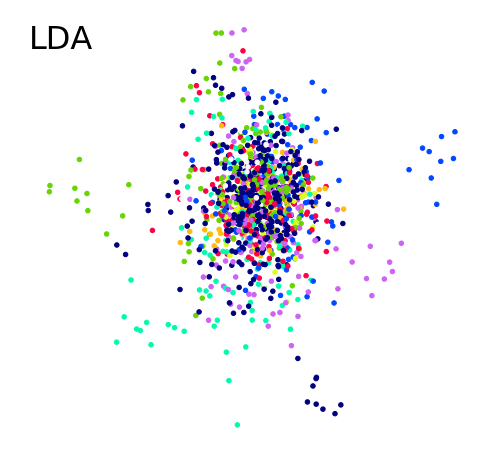

In [55]:
plt.figure(figsize=(8, 8))
plt.scatter(X_new[:, 0], X_new[:, 1], c=colors, s=20, cmap="gist_ncar")
plt.axis("off")
plt.text(plt.xlim()[0], plt.ylim()[1] * 0.8, "LDA", fontsize=32)
plt.show()

In [40]:
stims = np.unique(table["stim"])
labels = [stims.searchsorted(x) for x in table["stim"]]

In [41]:
X_new = clf.fit_transform(table["psth"].tolist(), labels)

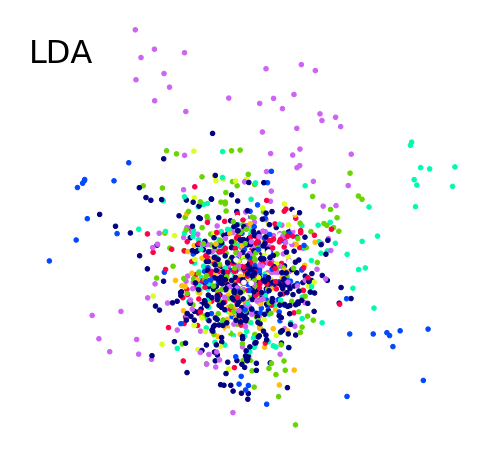

In [57]:
plt.figure(figsize=(8, 8))
plt.scatter(X_new[:, 2], X_new[:, 3], c=colors, s=20, cmap="gist_ncar")
plt.text(plt.xlim()[0], plt.ylim()[1] * 0.8, "LDA", fontsize=32)
plt.axis("off")
plt.show()